# Linear Regression Multiple Ways

## Making the data

We'll first construct a synthetic data set..using a function from the `scikit-learn` library. Synthetic data is nice in the sense that we can constrain how the noise behaves, and thus isolate effects.

In [0]:
%matplotlib inline
from sklearn.datasets import make_regression
import numpy as np
import matplotlib.pyplot as plt

In [0]:
#code adapted from http://tillbergmann.com/blog/python-gradient-descent.html
X, y, coef = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=20,
                       random_state=2018,
                       coef=True)

In [92]:
X.shape
y.shape

(100,)

In [93]:
X,y

(array([[-0.66853752],
        [-0.30667657],
        [ 1.33791644],
        [ 0.42185431],
        [ 1.30776377],
        [-0.67073429],
        [ 0.72887519],
        [-0.68806479],
        [-0.04269576],
        [ 1.45438362],
        [ 0.78704248],
        [ 0.41208037],
        [-0.77993308],
        [ 2.14839926],
        [-0.02305288],
        [ 0.45326871],
        [-0.30580386],
        [ 0.581851  ],
        [ 0.48408657],
        [ 0.13530749],
        [ 1.28273322],
        [-1.05741884],
        [-0.41355167],
        [ 0.7847546 ],
        [ 0.35407638],
        [-0.77191826],
        [ 0.06371017],
        [ 0.04708372],
        [-1.0656958 ],
        [ 0.11007867],
        [-1.65478408],
        [ 0.37062839],
        [ 1.0764461 ],
        [-2.4561093 ],
        [-0.0538778 ],
        [-0.57568194],
        [ 0.7047803 ],
        [-1.60454294],
        [ 0.17433269],
        [-0.92808999],
        [-0.01343378],
        [-2.48607587],
        [-0.36969037],
        [-1

Notice that the X is in the canonical array-of-arrays format.
**Try and print its shape**

We are fitting a model with an intercept. Lets see what it is.

In [94]:
coef

array(69.06406583)

We can plot the data.

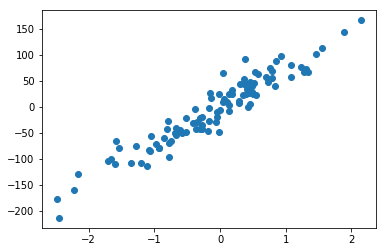

In [95]:
plt.plot(X,y, 'o');

For the purposes of drawing the regression line, lets create a uniform grid of points, and then reshape it into the canonical format

In [0]:
xgrid = np.linspace(-2.5,2.5,1000)
#linspace divides the extreme points (-25 to 25) into a grids of 1000 points in between
Xgrid = xgrid.reshape(-1,1)
#reshape just converts the size of the array

## Fit using sklearn

In [0]:
from sklearn.linear_model import LinearRegression

In [0]:
lr = LinearRegression()
lr.fit(X,y)
lr.coef_, lr.intercept_
ypgrid = lr.predict(Xgrid)


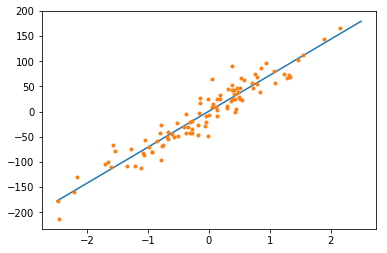

In [99]:
plt.plot(Xgrid, ypgrid)
plt.plot(X, y, '.')

In [0]:
from sklearn.metrics import r2_score

In [101]:
r2_score(y, lr.predict(X))#finding R^2 on the same data we fit the model on

0.911924455384811

## The impact of sample size

We'll sample 20 points from the data set. We do this by sampling 20 indices, index into X and y, and then fit on the sample

In [102]:
sample_indices = np.random.choice(range(100), size=20)
sample_indices

array([81, 42, 60, 87,  1, 21, 44, 16, 45, 48, 40, 21, 71, 94, 73, 68, 33,
       77, 72, 81])

In [0]:
Xsample = X[sample_indices]
ysample = y[sample_indices]

In [105]:
lr_s = LinearRegression().fit(Xsample, ysample)
r2_score(ysample, lr_s.predict(Xsample)), lr_s.score(Xsample, ysample)

(0.9152861989750251, 0.915286198975025)

Lets check the sensitivity of our prediction to our sample. We'll do this 1000 times

(0.7, 1)

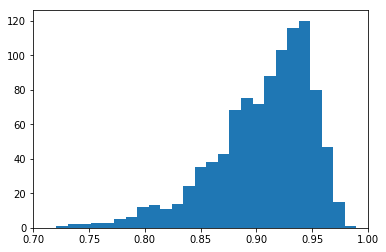

In [115]:
scores = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

Redo this with a higher amount of noise (about 400). For this you will need to create a new dataset. Plot the data. Plot the histogram of the R^2 as well as that of the coefficients.Try a smaller dataset as well. What conclusions can you draw?

In [0]:
# your code here
Xnew, ynew, coefnew = make_regression(n_samples = 100, 
                       n_features=1, 
                       noise=400,
                       random_state=2017,
                       coef=True)

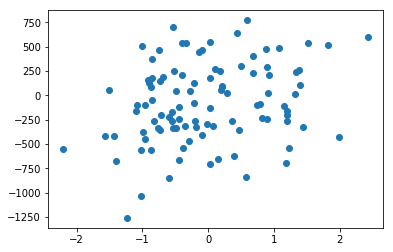

In [108]:
# your code here
plt.plot(Xnew,ynew, 'o');

(0.0, 1)

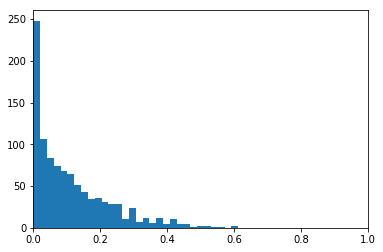

In [109]:
# your code here
scores = []
coeff = []
inter = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=20)
    Xsample = Xnew[sample_indices]
    ysample = ynew[sample_indices]
    lrnew = LinearRegression()
    scores.append(LinearRegression().fit(Xsample, ysample).score(Xsample, ysample))
    coeff.append(LinearRegression().fit(Xsample,ysample).coef_)
    inter.append(LinearRegression().fit(Xsample,ysample).intercept_)             

plt.hist(scores,  bins=np.linspace(0.0, 1, 50))
plt.xlim(0.0,1)
#plt.hist(coeff,  bins=np.linspace(0.0, 1, 50))
#plt.xlim(0.0,1)
#plt.hist(inter,  bins=np.linspace(0.0, 1, 50))
#plt.xlim(0.0,1)

(-400, 250)

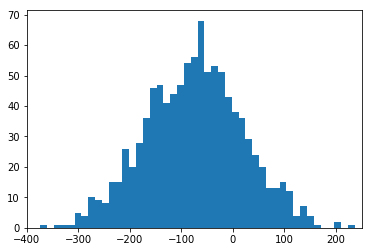

In [125]:
# your code here
plt.hist(inter,  bins=np.linspace(-400, 250, 50))
plt.xlim(-400,250)

# **BootStraping**
### My own code learned from the video lecture:

(0.7, 1)

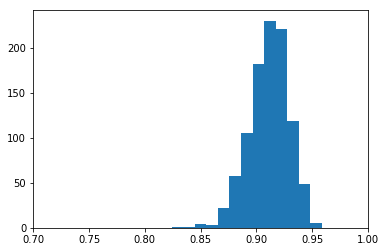

In [121]:

scores = []
slopes = []
intercepts = []
for i in range(1000):
    sample_indices = np.random.choice(range(100), size=100,replace = True)
    Xsample = X[sample_indices]
    ysample = y[sample_indices]
    linreg = LinearRegression().fit(Xsample, ysample)
    scores.append(linreg.score(Xsample, ysample))
    slopes.append(linreg.coef_[0])
    intercepts.append(linreg.intercept_)
plt.hist(scores,  bins=np.linspace(0.7, 1, 30))
plt.xlim(0.7,1)

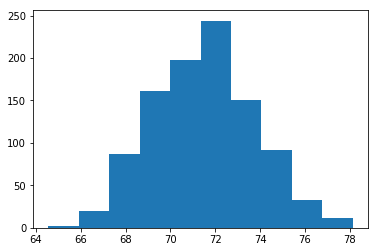

In [126]:
plt.hist(slopes);


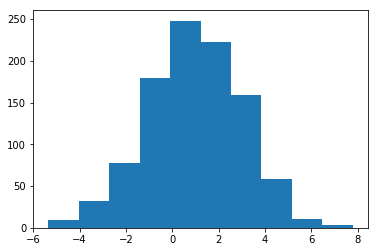

In [127]:
plt.hist(intercepts);

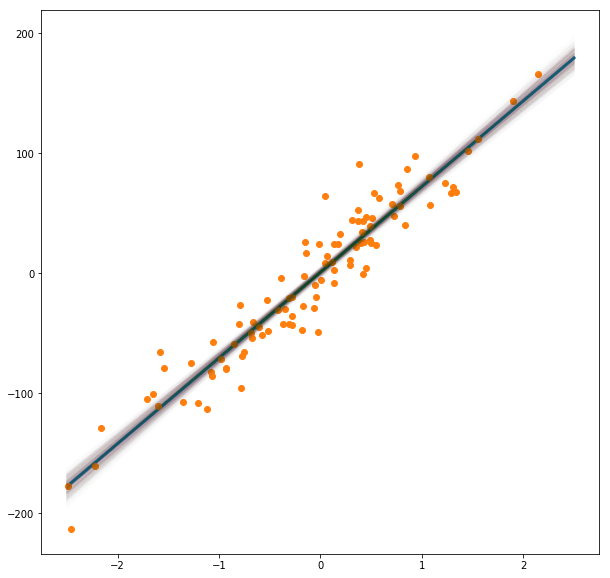

In [136]:
plt.figure(figsize=(10,10))
plt.plot(Xgrid,ypgrid,lw=3)
plt.plot(X,y, 'o');
for i in range (1000):
  line = lambda x: slopes[i]*x + intercepts[i]
  plt.plot(xgrid,line(xgrid),alpha = 0.005)

## Testing and training

A grid like the one we created might contain some of the points we fit this model on. This is called **Data Contamination** and is a big no-no. If we want an independent estimate of the error, we should hold out some points in a test set.

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=2017)

Now lets fit the model on the training set and evaluate it both on the training set and the test set. We print the R^2

In [0]:
lr2 = LinearRegression().fit(Xtrain, ytrain)
r2_test = r2_score(ytest, lr.predict(Xtest))
r2_train = r2_score(ytrain, lr.predict(Xtrain))

In [140]:
"Train R2 is {}, while test R^2 is {}".format(r2_train, r2_test)

'Train R2 is 0.8988503182834551, while test R^2 is 0.9350921543081208'

## Using Keras to fit the model

We'll use plain and simple gradient descent (why?) and Keras's Sequential API

In [0]:
from keras.models import Sequential
from keras.layers import Dense
lr3 = Sequential()
lr3.add(Dense(1, input_shape=(1,)))
lr3.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
lr3.summary()

In [0]:
history = lr3.fit(Xtrain, ytrain, epochs=400, batch_size=80)

In [0]:
plt.plot(history.history['loss'])

In [0]:
lr3.get_weights()

### Using the Keras Functional API



In [0]:
from keras.layers import Input, Dense
from keras.models import Model

inputs_placeholder = Input(shape=(1,))
outputs_placeholder = Dense(1, activation='linear')(inputs_placeholder)

m = Model(inputs=inputs_placeholder, outputs=outputs_placeholder)
m.compile(optimizer='sgd', loss='mean_squared_error',  metrics=['mae','accuracy'])
m.summary()

In [0]:
history2 = m.fit(Xtrain, ytrain, epochs=250, batch_size=80)

In [0]:
m.get_weights()